In [3]:
import pandas as pd
import numpy as np

# Se o arquivo estiver no Drive, mantenha o mount.
# Se for usar o arquivo Excel diretamente (.xlsx):
input_path = '/content/drive/MyDrive/grafico_dados_região_desenvolvimento_PEAR_PIB/20250106_extrações dados brutos_v2.xlsx'

# 1. Ler o Excel especificando a aba (Sheet)
df = pd.read_excel(input_path, sheet_name=0) # '0' pega a primeira aba

# 2. Limpeza de colunas numéricas
def clean_numeric(val):
    if pd.isna(val): return np.nan
    # Remove R$, %, espaços e converte para float
    s = str(val).replace('R$', '').replace('%', '').replace(' ', '').strip()
    # Se o Excel exportou com vírgula como decimal e ponto como milhar:
    # Ex: 1.490,59 -> 1490.59
    if ',' in s and '.' in s:
        s = s.replace('.', '').replace(',', '.')
    elif ',' in s:
        s = s.replace(',', '.')
    return pd.to_numeric(s, errors='coerce')

cols = ['IDH Municipal (2010)', 'População Censo IBGE (2022)',
        'Área IBGE km² (2022)', 'Densidade demográfica (hab/km²)',
        'Taxa de Urbanização (2022)', 'PIB Municipal (R$)', 'PIB per capita (R$)']

for col in cols:
    df[col] = df[col].apply(clean_numeric)

# 3. Correção de escala: Área = População / Densidade
# (Evita que áreas como 1.490,594 sejam lidas como 1 milhão)
df['Área IBGE km² (2022)'] = df['População Censo IBGE (2022)'] / df['Densidade demográfica (hab/km²)']

# 4. Agrupamento (Consolidação)
consolidado = df.groupby('Região de desenvolvimento ').agg({
    'IDH Municipal (2010)': 'mean',
    'População Censo IBGE (2022)': 'sum',
    'Área IBGE km² (2022)': 'sum',
    'PIB Municipal (R$)': 'sum',
    'Taxa de Urbanização (2022)': 'mean'
}).reset_index()

# 5. Recalcular indicadores da região
consolidado['Densidade demográfica (hab/km²)'] = consolidado['População Censo IBGE (2022)'] / consolidado['Área IBGE km² (2022)']
consolidado['PIB per capita (R$)'] = consolidado['PIB Municipal (R$)'] / consolidado['População Censo IBGE (2022)']

# 6. Salvar
output_path = '/content/drive/MyDrive/grafico_dados_região_desenvolvimento_PEAR_PIB/Tabela_Consolidada_Final.xlsx'
consolidado.to_excel(output_path, index=False)
print(f"Sucesso! Arquivo salvo em: {output_path}")

Sucesso! Arquivo salvo em: /content/drive/MyDrive/grafico_dados_região_desenvolvimento_PEAR_PIB/Tabela_Consolidada_Final.xlsx


Arquivo salvo no Drive: /content/drive/MyDrive/grafico_dados_região_desenvolvimento_PEAR_PIB/pib_per_capita_600dpi.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Arquivo salvo no Drive: /content/drive/MyDrive/grafico_dados_região_desenvolvimento_PEAR_PIB/idh_medio_600dpi.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Arquivo salvo no Drive: /content/drive/MyDrive/grafico_dados_região_desenvolvimento_PEAR_PIB/populacao_600dpi.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

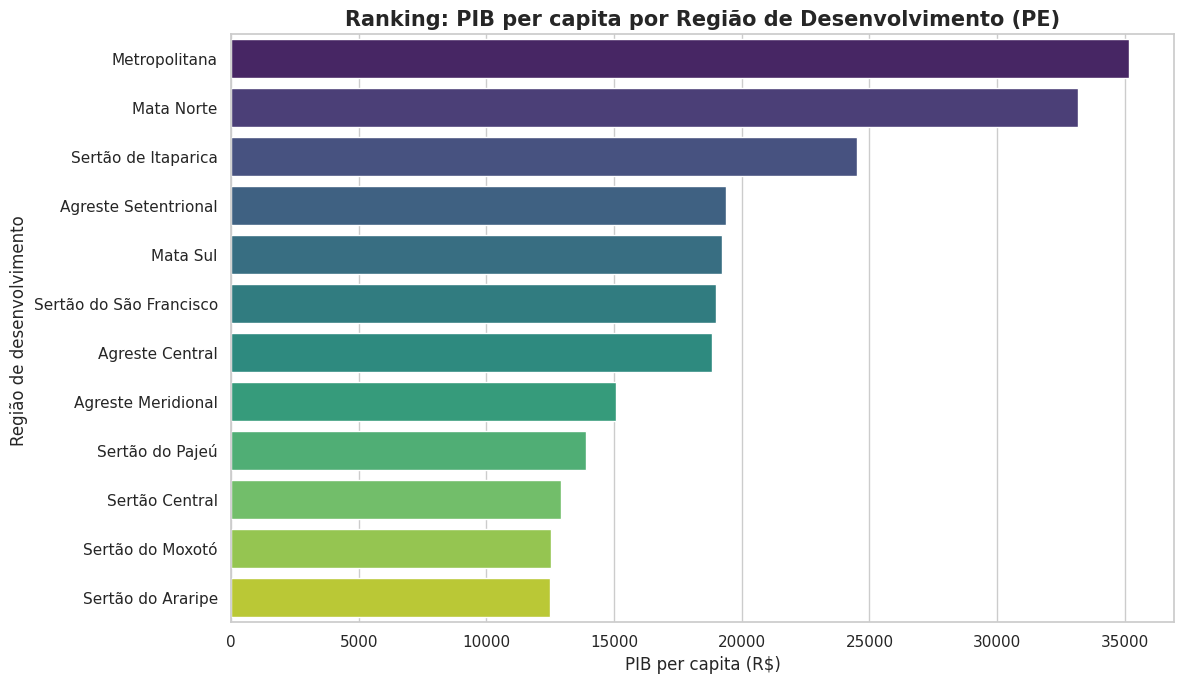

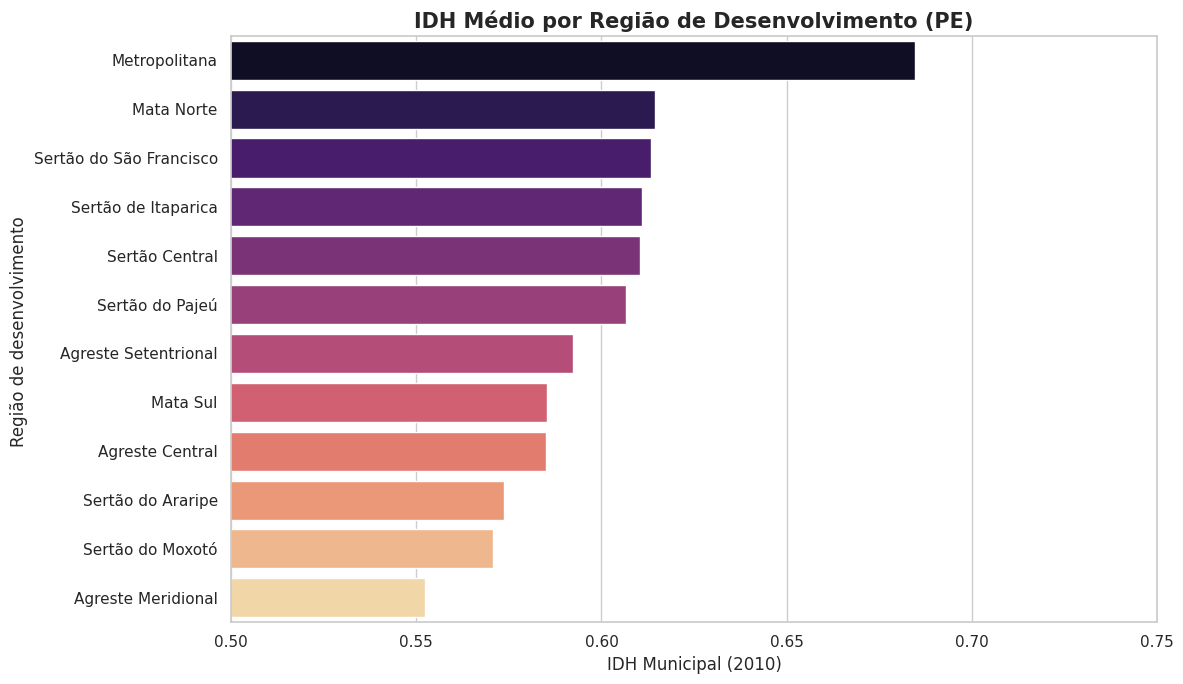

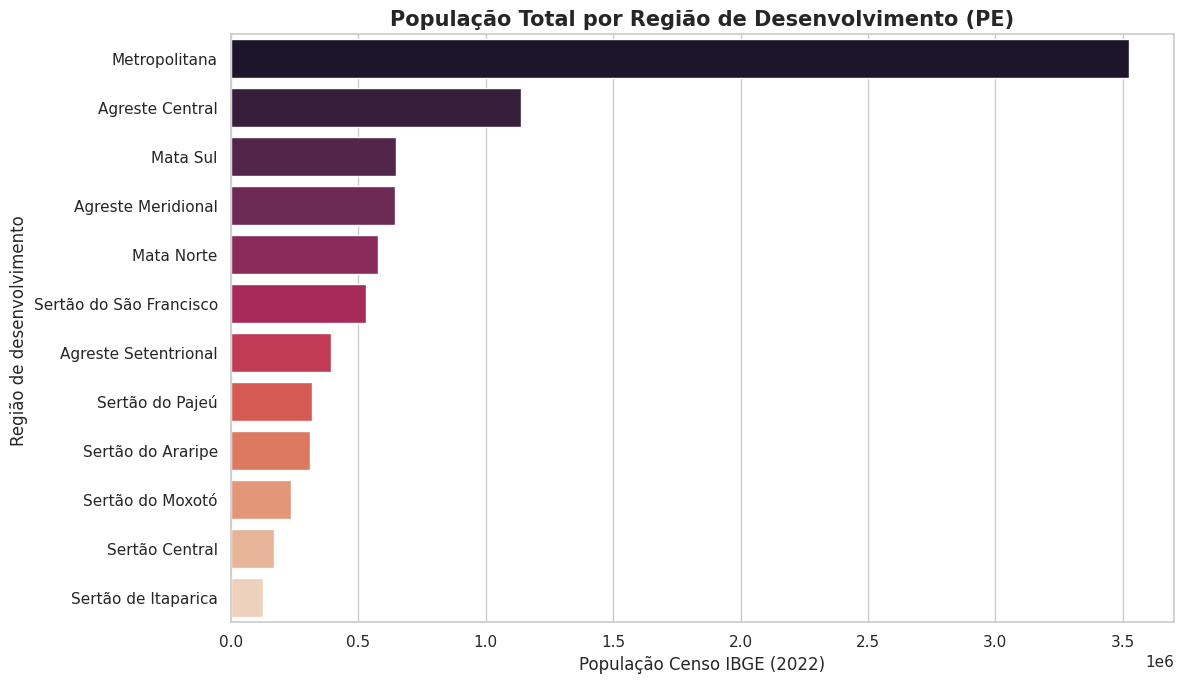

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files

# 1. Definição do caminho da pasta
pasta_resultados = '/content/drive/MyDrive/grafico_dados_região_desenvolvimento_PEAR_PIB/'
path_consolidado = os.path.join(pasta_resultados, 'Tabela_Consolidada_Final.xlsx')

# 2. Carregar os dados
df_plot = pd.read_excel(path_consolidado)
reg_col = 'Região de desenvolvimento '

# Configurações de estilo
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 7]

# Função para formatar e salvar
def salvar_grafico(fig, nome_arquivo):
    caminho_final = os.path.join(pasta_resultados, nome_arquivo)
    # Salva no Drive
    fig.savefig(caminho_final, dpi=600, bbox_inches='tight')
    print(f"Arquivo salvo no Drive: {caminho_final}")
    # Opcional: Baixar para o computador
    files.download(caminho_final)

# --- 1. PIB PER CAPITA ---
df_pib = df_plot.sort_values('PIB per capita (R$)', ascending=False)
fig1, ax1 = plt.subplots()
sns.barplot(data=df_pib, x='PIB per capita (R$)', y=reg_col, hue=reg_col, palette='viridis', legend=False, ax=ax1)
ax1.set_title('Ranking: PIB per capita por Região de Desenvolvimento (PE)', fontsize=15, fontweight='bold')
plt.tight_layout()
salvar_grafico(fig1, 'pib_per_capita_600dpi.png')

# --- 2. IDH MÉDIO ---
df_idh = df_plot.sort_values('IDH Municipal (2010)', ascending=False)
fig2, ax2 = plt.subplots()
sns.barplot(data=df_idh, x='IDH Municipal (2010)', y=reg_col, hue=reg_col, palette='magma', legend=False, ax=ax2)
ax2.set_title('IDH Médio por Região de Desenvolvimento (PE)', fontsize=15, fontweight='bold')
ax2.set_xlim(0.5, 0.75)
plt.tight_layout()
salvar_grafico(fig2, 'idh_medio_600dpi.png')

# --- 3. POPULAÇÃO TOTAL ---
df_pop = df_plot.sort_values('População Censo IBGE (2022)', ascending=False)
fig3, ax3 = plt.subplots()
sns.barplot(data=df_pop, x='População Censo IBGE (2022)', y=reg_col, hue=reg_col, palette='rocket', legend=False, ax=ax3)
ax3.set_title('População Total por Região de Desenvolvimento (PE)', fontsize=15, fontweight='bold')
plt.tight_layout()
salvar_grafico(fig3, 'populacao_600dpi.png')

In [8]:
import pandas as pd
import os

# 1. Definir caminhos
pasta_resultados = '/content/drive/MyDrive/grafico_dados_região_desenvolvimento_PEAR_PIB/'
path_consolidado = os.path.join(pasta_resultados, 'Tabela_Consolidada_Final.xlsx')
path_ranking = os.path.join(pasta_resultados, 'Ranking_Geral_Regioes.xlsx')

# 2. Carregar os dados
df = pd.read_excel(path_consolidado)

# 3. Criar os Rankings em ordem decrescente
ranking_pib = df[['Região de desenvolvimento ', 'PIB per capita (R$)']].sort_values(by='PIB per capita (R$)', ascending=False).reset_index(drop=True)
ranking_idh = df[['Região de desenvolvimento ', 'IDH Municipal (2010)']].sort_values(by='IDH Municipal (2010)', ascending=False).reset_index(drop=True)
ranking_pop = df[['Região de desenvolvimento ', 'População Censo IBGE (2022)']].sort_values(by='População Censo IBGE (2022)', ascending=False).reset_index(drop=True)

# 4. Salvar em um único Excel com várias abas
with pd.ExcelWriter(path_ranking) as writer:
    ranking_pib.to_excel(writer, sheet_name='Ranking_PIB_per_capita', index=True)
    ranking_idh.to_excel(writer, sheet_name='Ranking_IDH', index=True)
    ranking_pop.to_excel(writer, sheet_name='Ranking_Populacao', index=True)

# 5. Exibir os resultados formatados no console
print("--- RANKING: PIB PER CAPITA (R$) ---")
print(ranking_pib.to_string())

print("\n--- RANKING: IDH MUNICIPAL ---")
print(ranking_idh.to_string())

print("\n--- RANKING: POPULAÇÃO TOTAL ---")
print(ranking_pop.to_string())

print(f"\n✅ Rankings salvos com sucesso em: {path_ranking}")

--- RANKING: PIB PER CAPITA (R$) ---
   Região de desenvolvimento   PIB per capita (R$)
0               Metropolitana         35165.199954
1                  Mata Norte         33159.190638
2         Sertão de Itaparica         24495.382066
3        Agreste Setentrional         19368.284500
4                    Mata Sul         19208.500936
5     Sertão do São Francisco         19008.911461
6             Agreste Central         18814.330188
7          Agreste Meridional         15083.469066
8             Sertão do Pajeú         13905.023344
9              Sertão Central         12934.026798
10           Sertão do Moxotó         12521.548689
11          Sertão do Araripe         12482.484727

--- RANKING: IDH MUNICIPAL ---
   Região de desenvolvimento   IDH Municipal (2010)
0               Metropolitana              0.684533
1                  Mata Norte              0.614526
2     Sertão do São Francisco              0.613429
3         Sertão de Itaparica              0.611000
4       

In [9]:
import pandas as pd
import os

# Caminhos (ajuste para sua pasta do Drive)
pasta = '/content/drive/MyDrive/grafico_dados_região_desenvolvimento_PEAR_PIB/'
input_path = os.path.join(pasta, '20250106_extrações dados brutos_v2.xlsx')
output_path = os.path.join(pasta, 'Ranking_Geral_Municipios_PE.xlsx')

# 1. Carregar os dados
df = pd.read_excel(input_path, sheet_name=0)

# 2. Limpeza (Remover R$, converter para numérico)
cols = ['PIB per capita (R$)', 'IDH Municipal (2010)']
for col in cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace('R$', '').str.replace('.', '').str.replace(',', '.').str.strip(), errors='coerce')

# 3. Gerar os Rankings Gerais
ranking_pib = df[['Municípios', 'Região de desenvolvimento ', 'PIB per capita (R$)']].sort_values(by='PIB per capita (R$)', ascending=False).reset_index(drop=True)
ranking_pib.index = ranking_pib.index + 1

ranking_idh = df[['Municípios', 'Região de desenvolvimento ', 'IDH Municipal (2010)']].sort_values(by='IDH Municipal (2010)', ascending=False).reset_index(drop=True)
ranking_idh.index = ranking_idh.index + 1

# 4. Salvar
with pd.ExcelWriter(output_path) as writer:
    ranking_pib.to_excel(writer, sheet_name='Ranking_Geral_PIB')
    ranking_idh.to_excel(writer, sheet_name='Ranking_Geral_IDH')

print(f"Ranking completo salvo em: {output_path}")

Ranking completo salvo em: /content/drive/MyDrive/grafico_dados_região_desenvolvimento_PEAR_PIB/Ranking_Geral_Municipios_PE.xlsx


In [10]:
import pandas as pd
import os

# 1. Definir caminhos
pasta = '/content/drive/MyDrive/grafico_dados_região_desenvolvimento_PEAR_PIB/'
input_path = os.path.join(pasta, '20250106_extrações dados brutos_v2.xlsx')
output_path = os.path.join(pasta, 'Ranking_Municipios_por_Regiao_Discriminado.xlsx')

# 2. Carregar os dados
df = pd.read_excel(input_path, sheet_name=0)

# 3. Limpeza dos dados
df['PIB per capita (R$)'] = pd.to_numeric(df['PIB per capita (R$)'].astype(str).str.replace('R$', '').str.replace('.', '').str.replace(',', '.').str.strip(), errors='coerce')
df['IDH Municipal (2010)'] = pd.to_numeric(df['IDH Municipal (2010)'].astype(str).replace(',', '.'), errors='coerce')

# 4. Ordenar: Primeiro pela Região (A-Z) e depois pelo PIB (Decrescente)
df_sorted = df.sort_values(by=['Região de desenvolvimento ', 'PIB per capita (R$)'],
                           ascending=[True, False]).reset_index(drop=True)

# 5. Criar coluna de posição dentro da região
df_sorted['Posição na Região'] = df_sorted.groupby('Região de desenvolvimento ')['PIB per capita (R$)'].rank(ascending=False, method='min').astype(int)

# 6. Organizar colunas para o relatório final
colunas_relatorio = [
    'Região de desenvolvimento ',
    'Posição na Região',
    'Municípios',
    'PIB per capita (R$)',
    'IDH Municipal (2010)'
]
ranking_final = df_sorted[colunas_relatorio]

# 7. Salvar
ranking_final.to_excel(output_path, index=False)

print(f"✅ Ranking discriminado por região salvo em: {output_path}")

# Exibir os primeiros resultados para conferência
print(ranking_final.head(10).to_string(index=False))

✅ Ranking discriminado por região salvo em: /content/drive/MyDrive/grafico_dados_região_desenvolvimento_PEAR_PIB/Ranking_Municipios_por_Regiao_Discriminado.xlsx
Região de desenvolvimento   Posição na Região       Municípios  PIB per capita (R$)  IDH Municipal (2010)
           Agreste Central                  1      Belo Jardim              3594224                 0.629
           Agreste Central                  2 São Bento do Una              2452996                 0.593
           Agreste Central                  3          Caruaru              2345658                 0.677
           Agreste Central                  4           Pombos              1957738                 0.598
           Agreste Central                  5            Sairé              1835680                 0.585
           Agreste Central                  6          Gravatá              1593831                 0.634
           Agreste Central                  7         Bezerros              1579439              

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Caminhos e Configurações
pasta_resultados = '/content/drive/MyDrive/grafico_dados_região_desenvolvimento_PEAR_PIB/'
input_path = os.path.join(pasta_resultados, '20250106_extrações dados brutos_v2.xlsx')

# 2. Carregar dados
df = pd.read_excel(input_path, sheet_name=0)

# 3. Limpeza de dados (PIB per capita)
df['PIB per capita (R$)'] = pd.to_numeric(
    df['PIB per capita (R$)'].astype(str).str.replace('R$', '').str.replace('.', '').str.replace(',', '.').str.strip(),
    errors='coerce'
)

reg_col = 'Região de desenvolvimento '
regioes = df[reg_col].unique()

# Configuração de estilo do Seaborn
sns.set_theme(style="whitegrid")

for regiao in regioes:
    # FILTRO E ORDENAÇÃO: Alterado para 'ascending=False' para ordem DECRESCENTE
    df_reg = df[df[reg_col] == regiao].sort_values(by='PIB per capita (R$)', ascending=False)

    # Ajustar altura proporcional ao número de municípios para não embolar
    altura_grafico = max(6, len(df_reg) * 0.5)
    plt.figure(figsize=(14, altura_grafico))

    # Criação do gráfico de barras
    ax = sns.barplot(
        data=df_reg,
        x='PIB per capita (R$)',
        y='Municípios',
        hue='Municípios',
        palette='viridis',
        legend=False  # Remove a legenda lateral repetitiva
    )

    # Títulos e legendas
    plt.title(f'Ranking de PIB per capita: {regiao} (Ordem Decrescente)', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('PIB per capita (R$)', fontsize=12)
    plt.ylabel('Municípios', fontsize=12)

    # Adicionar os rótulos de valores ao final de cada barra
    for p in ax.patches:
        valor = p.get_width()
        if valor > 0:
            ax.annotate(
                f'R$ {valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'),
                (valor, p.get_y() + p.get_height()/2),
                ha='left', va='center',
                fontsize=10,
                xytext=(8, 0),
                textcoords='offset points'
            )

    plt.tight_layout()

    # Nome do arquivo e Salvamento em 600 DPI
    nome_arquivo = f"grafico_decrescente_{regiao.strip().replace(' ', '_')}.png"
    plt.savefig(os.path.join(pasta_resultados, nome_arquivo), dpi=600, bbox_inches='tight')
    plt.close()

print(f"✅ Processo concluído! Os gráficos em ordem decrescente foram salvos em: {pasta_resultados}")

✅ Processo concluído! Os gráficos em ordem decrescente foram salvos em: /content/drive/MyDrive/grafico_dados_região_desenvolvimento_PEAR_PIB/
